In [1]:
from gridworld import *
% matplotlib inline

# create the gridworld as a specific MDP
gridworld=GridMDP([[-0.04,-0.04,-0.04,1],[-0.04,None, -0.04, -1], [-0.04, -0.04, -0.04, -0.04]], terminals=[(3,2), (3,1)], gamma=1.)

example_pi = {(0,0): (0,1), (0,1): (0,1), (0,2): (1,0), (1,0): (1,0), (1,2): (1,0), (2,0): (0,1), (2,1): (0,1), (2,2): (1,0), (3,0):(-1,0), (3,1): None, (3,2):None}

example_V = {(0,0): 0.1, (0,1): 0.2, (0,2): 0.3, (1,0): 0.05, (1,2): 0.5, (2,0): 0., (2,1): -0.2, (2,2): 0.5, (3,0):-0.4, (3,1): -1, (3,2):+1}

In [20]:
""" 
1) 	Complete the function policy evaluation below and use it on example_pi!
	The function takes as input a policy pi, and an MDP (including its transition model, 
	reward and discounting factor gamma), and gives as output the value function for this
	specific policy in the MDP. Use equation (1) in the lecture slides!
"""


def policy_evaluation(pi, V, mdp, k=20):
    """Return an updated value function V for each state in the MDP """
    R, T, gamma = mdp.R, mdp.T, mdp.gamma	# retrieve reward, transition model and gamma from the MDP
    for i in range(k):				# iterative update of V
        for s in mdp.states:
            V[s] = R(s) + gamma
            action = pi[s]
            probabilities = T(s, action)
            aux = 0
            for p, state in probabilities:
                aux += p * V[state]            
            V[s] += aux
            # raise NotImplementedError # implement iterative policy evaluation here
    return V

In [26]:
def policy_evaluation(pi, V, mdp, k=20):
    """Return an updated value function V for each state in the MDP """
    R, T, gamma = mdp.R, mdp.T, mdp.gamma	# retrieve reward, transition model and gamma from the MDP
    for i in range(k):				# iterative update of V
        for s in mdp.states:
            V[s] = R(s) + gamma * sum([p * V[s1] for (p, s1) in T(s, pi[s])])
    return V

In [27]:
R = gridworld.R
T = gridworld.T

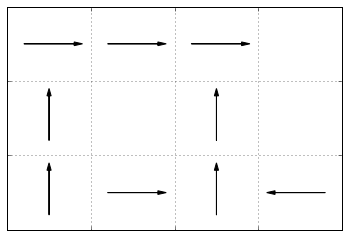

In [28]:
V=policy_evaluation(example_pi, example_V, gridworld)
gridworld.policy_plot(example_pi)

In [29]:
print(V)

{(1, 2): 0.8678082191892927, (3, 2): 1.0, (0, 0): 0.6910041685693834, (3, 0): 0.35695253067190863, (2, 1): 0.6602739726059087, (1, 0): 0.5265715933617807, (0, 1): 0.7615582342646277, (3, 1): -1.0, (2, 0): 0.5765715913091487, (2, 2): 0.9178082191786289, (0, 2): 0.8115582213945166}


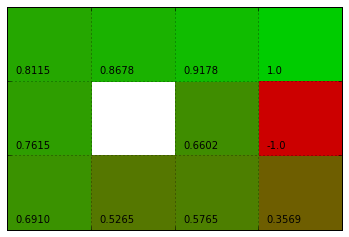

In [30]:
gridworld.v_plot(V)

In [ ]:
"""
2)	Complete the function value iteration below and use it to compute the optimal value function for the gridworld.
	The function takes as input the MDP (including reward function and transition model) and is supposed to compute
	the optimal value function using the value iteration algorithm presented in the lecture. Use the function best_policy
	to compute to compute the optimal policy under this value function!

"""

def value_iteration(mdp, epsilon=0.0001):
    "Solving an MDP by value iteration. epsilon determines the convergence criterion for stopping"
    V1 = dict([(s, 0) for s in mdp.states]) # initialize value function
    R, T, gamma = mdp.R, mdp.T, mdp.gamma
    while True:
        V = V1.copy()
        delta = 0
        for s in mdp.states:
            raise NotImplementedError # implement the value iteration step here
            delta = max(delta, abs(V1[s] - V[s]))
        if delta < epsilon:
             return V


def argmax(seq, fn):
    best = seq[0]; best_score = fn(best)
    for x in seq:
        x_score = fn(x)
        if x_score > best_score:
            best, best_score = x, x_score
    return best

def expected_utility(a, s, V, mdp):
    "The expected utility of doing a in state s, according to the MDP and U."
    return sum([p * V[s1] for (p, s1) in mdp.T(s, a)])


def best_policy(mdp, V):
    """Given an MDP and a utility function V, best_policy determines the best policy,
    as a mapping from state to action. """
    pi = {}
    for s in mdp.states:
        pi[s] = argmax(mdp.actions(s), lambda a:expected_utility(a, s, V, mdp))
    return pi

In [ ]:
Vopt=value_iteration(gridworld)
piopt = best_policy(gridworld, Vopt)
gridworld.policy_plot(piopt)
gridworld.v_plot(Vopt)

In [ ]:
"""
3)	Complete the function policy iteration below and use it to compute the optimal policy for the gridworld.
	The function takes as input the MDP (including reward function and transition model) and is supposed to compute
	the optimal policy using the policy iteration algorithm presented in the lecture. Compare the result with what
	you got from running value_iteration and best_policy!	
"""


def policy_iteration(mdp):
    "Solve an MDP by policy iteration"
    V = dict([(s, 0) for s in mdp.states])
    pi = dict([(s, random.choice(mdp.actions(s))) for s in mdp.states])
    while True:
        raise NotImplementedError # find value function for this policy 
        unchanged = True
        for s in mdp.states:
            raise NotImplementedError # update policy
            if a != pi[s]:
                unchanged = False
        if unchanged:  
            return pi